In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#2
# URL to the Wheat Seeds Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Read the dataset from the URL using Pandas
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(df.head())
# Select specific columns (Area, Perimeter, Compactness, and Class)
selected_columns = ['Area', 'Perimeter', 'Compactness', 'Class']
selected_data = df[selected_columns]

# Convert the selected data to a NumPy array
numpy_array = selected_data.to_numpy()

# Display the first few rows of the NumPy array
print(numpy_array[:5])


    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry coefficient  Length of kernel groove  Class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1  
[[15.26   14.84    0.871   1.    ]
 [14.88   14.57    0.8811  1.    ]
 [14.29   14.09    0.905   1.    ]
 [13.84   13.94    0.8955  1.    ]
 [16.14   14.99    0.9034  1.    ]]


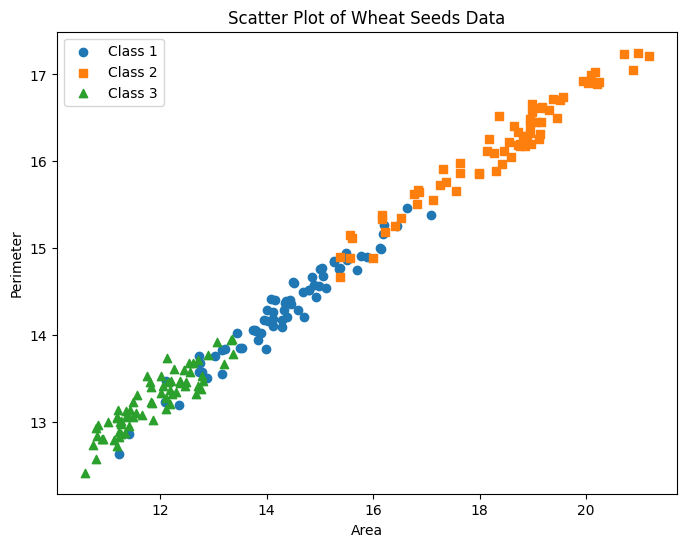

In [ ]:
# Create a dictionary to map class labels to shapes
class_to_shape = {
    1: 'o',  # Circle
    2: 's',  # Square
    3: '^',  # Triangle
}

# Create a scatter plot
plt.figure(figsize=(8, 6))

for class_label, shape in class_to_shape.items():
    # Filter data for the current class
    class_data = numpy_array[numpy_array[:, -1] == class_label]

    # Extract Area and Perimeter columns
    area = class_data[:, 0]
    perimeter = class_data[:, 1]

    # Plot data points with the specified shape
    plt.scatter(area, perimeter, marker=shape, label=f'Class {class_label}')

# Add labels and a legend
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter Plot of Wheat Seeds Data')
plt.legend()

# Show the plot
plt.show()

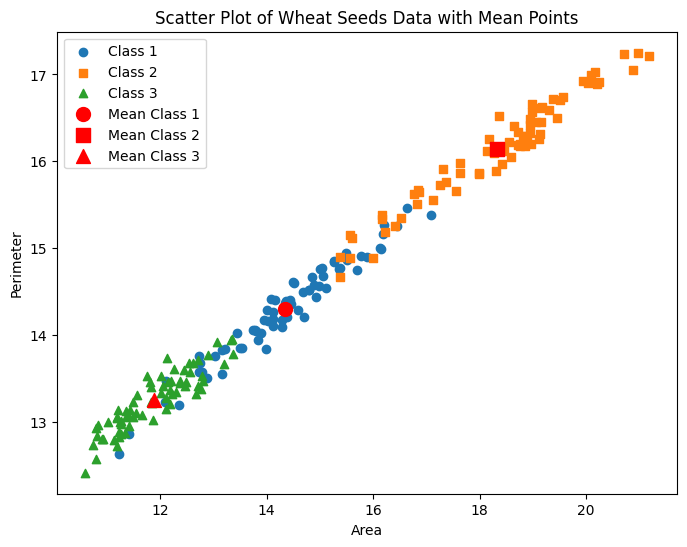

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Create empty arrays to store mean points and labels
mean_points = []
mean_labels = []

for class_label, shape in class_to_shape.items():
    # Filter data for the current class
    class_data = numpy_array[numpy_array[:, -1] == class_label]

    # Extract Area and Perimeter columns
    area = class_data[:, 0]
    perimeter = class_data[:, 1]

    # Plot data points with the specified shape
    plt.scatter(area, perimeter, marker=shape, label=f'Class {class_label}')

    # Calculate the mean for the current class
    mean_point = np.mean(class_data, axis=0)
    mean_points.append(mean_point)
    mean_labels.append(f'Mean Class {class_label}')

# Convert the lists of mean points and labels to NumPy arrays
mean_points = np.array(mean_points)

# Plot mean points with larger size and the same shape
for i, shape in enumerate(class_to_shape.values()):
    plt.scatter(mean_points[i, 0], mean_points[i, 1], marker=shape, s=100, label=mean_labels[i], color='red')

# Add labels and a legend
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter Plot of Wheat Seeds Data with Mean Points')
plt.legend()

# Show the plot
plt.show()


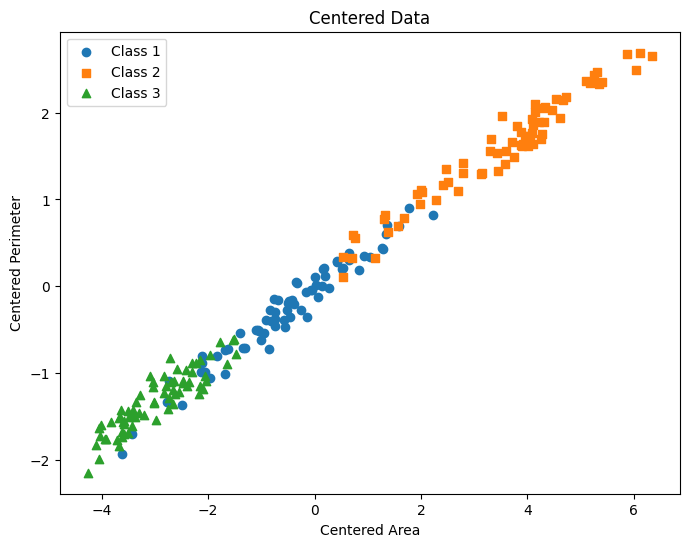

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the centered version of Area and Perimeter
centered_area = numpy_array[:, 0] - np.mean(numpy_array[:, 0])
centered_perimeter = numpy_array[:, 1] - np.mean(numpy_array[:, 1])

# Create a new plot for centered data
plt.figure(figsize=(8, 6))

for class_label, shape in class_to_shape.items():
    class_indices = (numpy_array[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Centered Data')

# Show the plot
plt.legend()
plt.show()


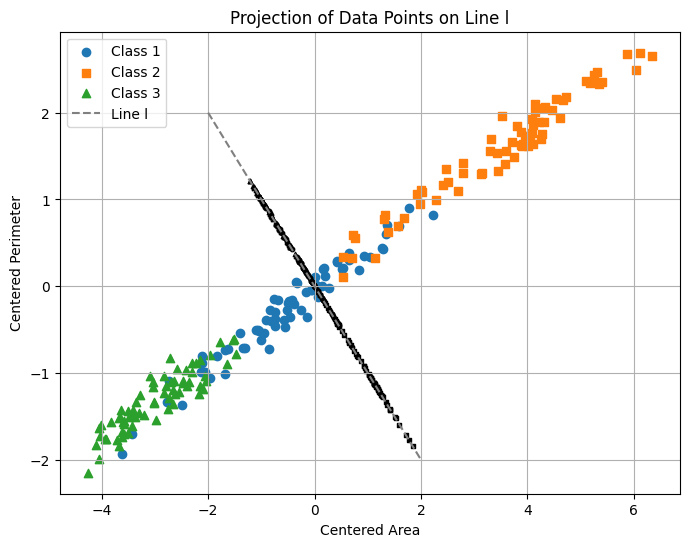

In [ ]:
# Calculate the centered version of Area and Perimeter
centered_area = numpy_array[:, 0] - np.mean(numpy_array[:, 0])
centered_perimeter = numpy_array[:, 1] - np.mean(numpy_array[:, 1])

# Define the line vector [-1.75 1.75]
line_vector = np.array([-1.75, 1.75])

# Calculate the projection of each data point onto the line
projections = np.dot(np.column_stack((centered_area, centered_perimeter)), line_vector)

# Create an empty list to store the projection vectors
projection_list = []

# Calculate the projection for each data point
for i in range(len(projections)):
    projection = (projections[i] / np.dot(line_vector, line_vector)) * line_vector
    projection_list.append(projection)

# Convert the list of projection vectors to a NumPy array
projections = np.array(projection_list)

# Create a new plot for centered data
plt.figure(figsize=(8, 6))

# Plot centered data points
for class_label, shape in class_to_shape.items():
    class_indices = (numpy_array[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

    # Plot the projected points on the line with the same shape but smaller size
    class_projections = projections[class_indices]
    for i in range(len(class_projections)):
        projection = class_projections[i]
        plt.scatter(projection[0], projection[1], marker=shape, s=10, color='black')

# Plot the line l: x1 = -x2
plt.plot([-2, 2], [2, -2], color='gray', linestyle='--', label='Line l')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Projection of Data Points on Line l')

# Show the plot with legend
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the centered data matrix D_bar
D_bar = numpy_array[:, :2] - numpy_array[:, :2].mean(axis=0)

# Calculate the covariance matrix cov = D_bar^T * D_bar
covariance_matrix = np.dot(D_bar.T, D_bar)

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[1769.46731238  789.69462857]
 [ 789.69462857  356.45539286]]


In [ ]:
n = len(D_bar)
S = n * covariance_matrix

print("S:")
print(S)

S:
[[371588.1356 165835.872 ]
 [165835.872   74855.6325]]


In [ ]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(S)

# Display the eigenvalues and eigenvectors
print("Eigenvalues of S:")
print(eigenvalues)

print("\nEigenvectors of S:")
print(eigenvectors)

Eigenvalues of S:
[445739.48119908    704.28690092]

Eigenvectors of S:
[[ 0.912897   -0.40818998]
 [ 0.40818998  0.912897  ]]


In [ ]:
# Check if eigenvectors are orthonormal
is_orthonormal = np.allclose(np.dot(eigenvectors.T, eigenvectors), np.eye(len(eigenvectors)))

if is_orthonormal:
    print("Eigenvectors are already orthonormal.")
else:
    # Gram-Schmidt orthogonalization using NumPy
    orthonormal_eigenvectors = np.linalg.qr(eigenvectors)[0]

    print("Orthonormal Eigenvectors:")
    print(orthonormal_eigenvectors)

    # Check if the new vectors are orthonormal
    is_orthonormal_after_gram_schmidt = np.allclose(np.dot(orthonormal_eigenvectors.T, orthonormal_eigenvectors), np.eye(len(eigenvectors)))
    print("Are orthonormal after Gram-Schmidt:", is_orthonormal_after_gram_schmidt)

Eigenvectors are already orthonormal.


In [ ]:
# Find the index of the eigenvector with the largest eigenvalue
index_largest_eigenvalue = np.argmax(eigenvalues)

# Select the eigenvector corresponding to the largest eigenvalue
u = eigenvectors[:, index_largest_eigenvalue]

# Normalize u to make it a unit vector

# Display the selected vector u
print("Selected Vector u:")
print(u)


Selected Vector u:
[0.912897   0.40818998]


In [ ]:
# Assuming u is the selected eigenvector
# u = ...

# Project all 2D points onto the selected eigenvector u
dot_products = np.dot(numpy_array[:, :2], u)
projected_points = dot_products[:, np.newaxis] * u

# Display the projected points
print("Projected Points:")
print(projected_points)


Projected Points:
[[18.24730263  8.1590432 ]
 [17.83000631  7.9724546 ]
 [17.15944656  7.67262256]
 [16.72852983  7.47994376]
 [19.03657317  8.51195522]
 [17.27916709  7.72615403]
 [17.6418531   7.88832434]
 [17.01316435  7.60721437]
 [19.62006847  8.77285753]
 [19.38347266  8.6670668 ]
 [18.25102898  8.16070939]
 [16.968852    7.58740068]
 [16.80000971  7.51190506]
 [16.72324322  7.47757993]
 [16.68618163  7.46100832]
 [17.48026157  7.8160708 ]
 [16.81254707  7.51751098]
 [18.57211925  8.30428071]
 [17.545849    7.84539736]
 [15.65726807  7.00094305]
 [17.16662402  7.67583186]
 [17.07278601  7.63387342]
 [18.78635694  8.4000743 ]
 [14.99720823  6.70580591]
 [18.00914656  8.05255482]
 [19.14159024  8.55891223]
 [15.97808308  7.1443913 ]
 [15.71119923  7.02505767]
 [17.04297518  7.6205439 ]
 [16.43332209  7.34794548]
 [16.11711454  7.2065574 ]
 [18.47624379  8.26141125]
 [17.1120137   7.65141357]
 [16.89757406  7.55552969]
 [18.01267097  8.05413071]
 [19.0236319   8.5061687 ]
 [19.19091

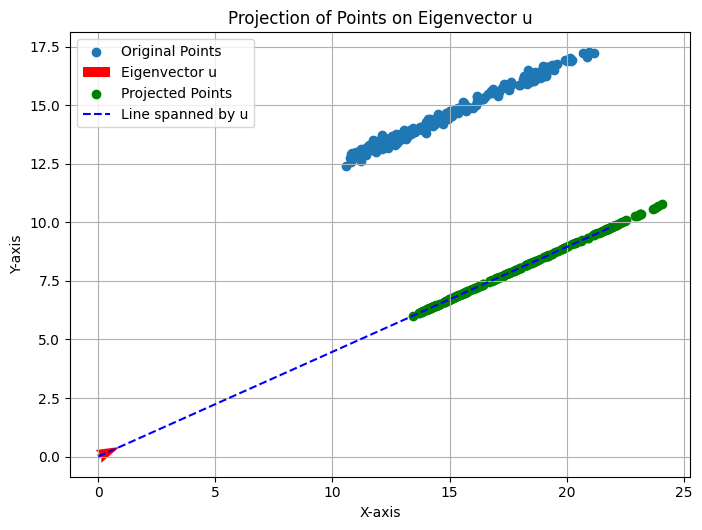

In [ ]:
import matplotlib.pyplot as plt

# Assuming u is the selected eigenvector and projected_points are calculated
# u = ...
# projected_points = ...

# Find the endpoints of the line spanned by u
max_projected_distance = np.abs(projected_points).max()
line_endpoints = max_projected_distance * u

# Plot the eigenvector u and the projected points
plt.figure(figsize=(8, 8))
plt.scatter(numpy_array[:, 0], numpy_array[:, 1], label='Original Points')
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='red', label='Eigenvector u')
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='green', label='Projected Points')

# Plot the line spanned by u
plt.plot([0, line_endpoints[0]], [0, line_endpoints[1]], color='blue', linestyle='--', label='Line spanned by u')

# Set axis labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Projection of Points on Eigenvector u')
plt.legend()

# Set the aspect ratio of the plot to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Assuming u is the selected eigenvector
# u = ...

# Calculate the new coordinates [X]U
new_coordinates_U = np.dot(numpy_array[:, :2], u)

# Display the new coordinates
print("New Coordinates [X]U:")
print(new_coordinates_U)


New Coordinates [X]U:
[19.98834759 19.53123543 18.79669501 18.32466286 20.85292545 18.92783853
 19.3251298  18.63645545 21.49209427 21.23292394 19.99242949 18.58791508
 18.40296291 18.31887184 18.27827406 19.1481202  18.41669651 20.3441562
 19.21996558 17.15118792 18.80455729 18.70176584 20.57883513 16.42814924
 19.72746814 20.96796259 17.50261312 17.21026486 18.66911064 18.00128822
 17.6549101  20.23913289 18.7447364  18.50983625 19.73132882 20.83874941
 21.02199246 21.87024272 19.43779417 18.82022124 18.01405666 17.97754078
 17.5446988  20.21560667 19.72895604 18.32896598 20.04698209 19.6275722
 19.4286652  19.55379649 19.05103948 20.49162733 19.1915332  18.91076698
 19.21483821 19.74980798 19.05801689 19.51060471 20.06932193 16.55350175
 15.67460693 15.4072728  16.66743281 17.71784772 17.20596174 17.26867814
 18.95663305 18.62272184 18.99218376 17.23379109 22.61725006 21.76952254
 22.17743068 24.08263082 21.6859542  21.68521025 22.30567869 25.93921031
 24.02132203 21.9761509  21.351

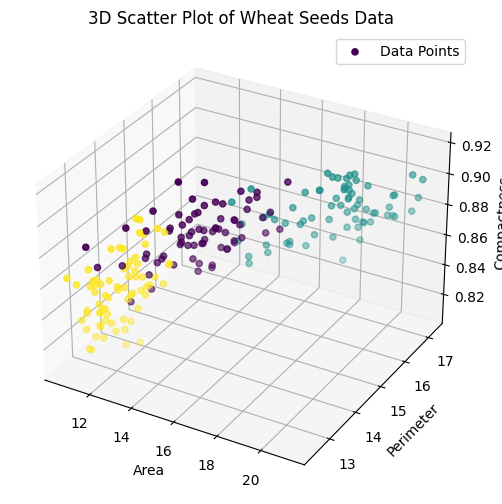

In [ ]:
#in 3D
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# URL to the Wheat Seeds Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Read the dataset from the URL using Pandas
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three dimensions (Area, Perimeter, Compactness)
area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']

# Scatter plot in 3D
ax.scatter(area, perimeter, compactness, c=df['Class'], cmap='viridis', marker='o', label='Data Points')

# Add labels and a title
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
ax.set_title('3D Scatter Plot of Wheat Seeds Data')

# Show the plot
plt.legend()
plt.show()


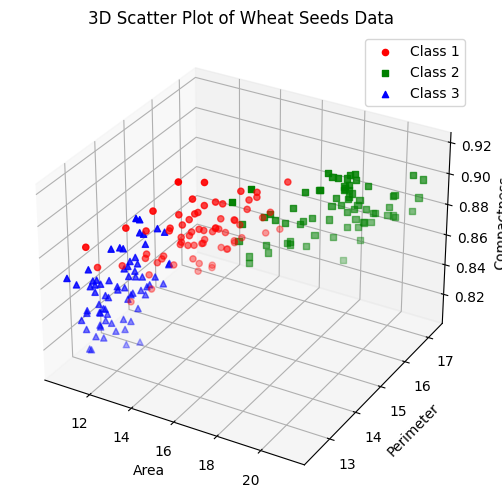

In [ ]:
#2
# Create a 3D scatter plot
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three dimensions (Area, Perimeter, Compactness)
area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']
class_labels = df['Class']

# Define shapes and colors for different classes
class_shapes = {1: 'o', 2: 's', 3: '^'}
class_colors = {1: 'red', 2: 'green', 3: 'blue'}

# Scatter plot in 3D with different shapes and colors for classes
for class_label in class_labels.unique():
    indices = class_labels[class_labels == class_label].index
    ax.scatter(area[indices], perimeter[indices], compactness[indices],
               c=class_colors[class_label], marker=class_shapes[class_label],
               label=f'Class {class_label}')

# Add labels and a title
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
ax.set_title('3D Scatter Plot of Wheat Seeds Data')

# Show the plot with legend
plt.legend()
plt.show()

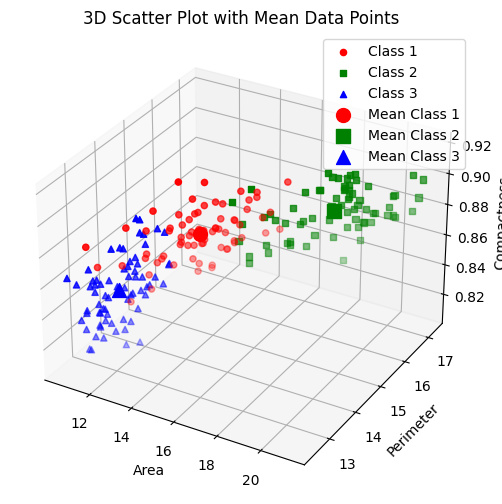

In [ ]:
#3
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three dimensions (Area, Perimeter, Compactness)
area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']
class_labels = df['Class']

# Define shapes and colors for different classes
class_shapes = {1: 'o', 2: 's', 3: '^'}
class_colors = {1: 'red', 2: 'green', 3: 'blue'}

# Calculate the mean data points
mean_points = []

for class_label in class_labels.unique():
    indices = class_labels[class_labels == class_label].index
    class_area = area[indices]
    class_perimeter = perimeter[indices]
    class_compactness = compactness[indices]

    mean_point = np.mean(class_area), np.mean(class_perimeter), np.mean(class_compactness)
    mean_points.append(mean_point)

for class_label in class_labels.unique():
    indices = class_labels[class_labels == class_label].index
    ax.scatter(area[indices], perimeter[indices], compactness[indices],
               c=class_colors[class_label], marker=class_shapes[class_label],
               label=f'Class {class_label}')


# Plot the mean data points with larger size
for class_label, shape in class_shapes.items():
    mean_point = mean_points[class_label - 1]  # class_label starts from 1
    ax.scatter(mean_point[0], mean_point[1], mean_point[2], c=class_colors[class_label],
               marker=shape, s=100, label=f'Mean Class {class_label}')

# Add labels and a title
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
ax.set_title('3D Scatter Plot with Mean Data Points')

# Show the plot with legend
plt.legend()
plt.show()

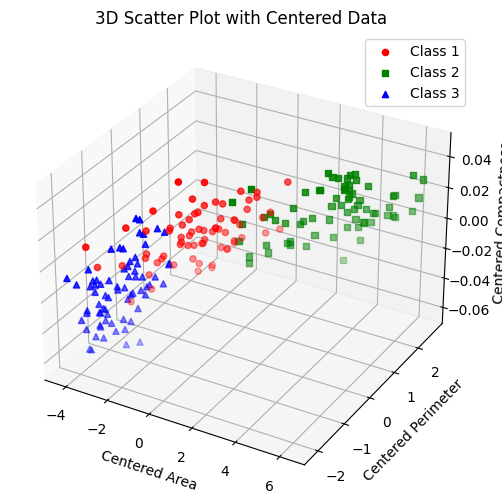

In [ ]:
#4
# Calculate the centered version of Area, Perimeter, and Compactness
centered_area = area - area.mean()
centered_perimeter = perimeter - perimeter.mean()
centered_compactness = compactness - compactness.mean()

# Create a new 3D scatter plot for centered data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the centered data points with different shapes and colors based on class
for class_label, shape in class_shapes.items():
    indices = class_labels[class_labels == class_label].index
    class_centered_area = centered_area[indices]
    class_centered_perimeter = centered_perimeter[indices]
    class_centered_compactness = centered_compactness[indices]

    ax.scatter(class_centered_area, class_centered_perimeter, class_centered_compactness,
               c=class_colors[class_label], marker=shape, label=f'Class {class_label}')

# Add labels and a title
ax.set_xlabel('Centered Area')
ax.set_ylabel('Centered Perimeter')
ax.set_zlabel('Centered Compactness')
ax.set_title('3D Scatter Plot with Centered Data')

# Show the plot with legend
plt.legend()
plt.show()


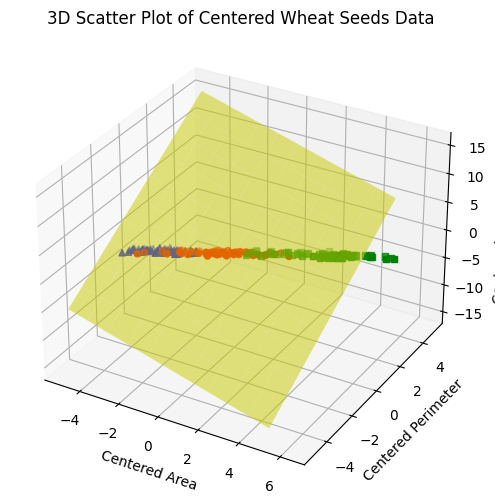

In [ ]:
#4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate the centered version of 'Area,' 'Perimeter,' and 'Compactness'
centered_area = area - area.mean()
centered_perimeter = perimeter - perimeter.mean()
centered_compactness = compactness - compactness.mean()

# Create a new 3D scatter plot for centered data
fig_centered = plt.figure(figsize=(8, 6))
ax_centered = fig_centered.add_subplot(111, projection='3d')

# Define different shapes and colors for the classes
class_info = class_labels.unique()
class_shapes = ['o', 's', '^']
class_colors = ['red', 'green', 'blue']

# Scatter plot in 3D for centered data with different shapes and colors for classes
for i, class_label in enumerate(class_info):
    indices = class_labels[class_labels == class_label].index
    shape = class_shapes[i]
    color = class_colors[i]
    ax_centered.scatter(centered_area[indices], centered_perimeter[indices], centered_compactness[indices],
                        c=color, marker=shape, label=f'Class {class_label}')

# Add labels and a title
ax_centered.set_xlabel('Centered Area')
ax_centered.set_ylabel('Centered Perimeter')
ax_centered.set_zlabel('Centered Compactness')
ax_centered.set_title('3D Scatter Plot of Centered Wheat Seeds Data')

# Define the plane's normal vectors
normal_vector1 = np.array([1, -2, 1])
normal_vector2 = np.array([2, 1, 0])

# Create a grid for the plane
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
zz = (normal_vector1[0] * xx + normal_vector1[1] * yy) / -normal_vector1[2]

# Plot the plane
ax_centered.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

# Show the plot
plt.show()


In [ ]:
# Combine the centered data into a centered matrix D_bar
D_bar = np.vstack((centered_area, centered_perimeter, centered_compactness)).T

# Calculate the covariance matrix cov = D_bar^T * D_bar
covariance_matrix = np.dot(D_bar.T, D_bar)

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[1.76946731e+03 7.89694629e+02 8.74091626e+00]
 [7.89694629e+02 3.56455393e+02 3.41337779e+00]
 [8.74091626e+00 3.41337779e+00 1.16695010e-01]]


In [ ]:
# Assuming you have the covariance matrix and the number of data points
n = len(D_bar)  # Number of data points

# Calculate S = n * cov
S = n * covariance_matrix

# Display the scatter matrix S
print("Scatter Matrix S:")
print(S)


Scatter Matrix S:
[[3.71588136e+05 1.65835872e+05 1.83559241e+03]
 [1.65835872e+05 7.48556325e+04 7.16809335e+02]
 [1.83559241e+03 7.16809335e+02 2.45059520e+01]]


In [ ]:
# Assuming you have the scatter matrix S
# S = ...

# Calculate eigenvalues and eigenvectors
eigenvalues_S, eigenvectors_S = np.linalg.eig(S)

# Display the eigenvalues and eigenvectors
print("Eigenvalues of Scatter Matrix S:")
print(eigenvalues_S)

print("\nEigenvectors of Scatter Matrix S:")
print(eigenvectors_S)


Eigenvalues of Scatter Matrix S:
[4.45748173e+05 7.17127560e+02 2.97333830e+00]

Eigenvectors of Scatter Matrix S:
[[-0.91288849 -0.40396225 -0.05872912]
 [-0.40818514  0.90489481  0.12062451]
 [-0.00441592 -0.13408908  0.99095944]]


In [ ]:
# Check if eigenvectors are orthonormal
is_orthonormal = np.allclose(np.dot(eigenvectors_S.T, eigenvectors_S), np.eye(len(eigenvectors_S)))

if is_orthonormal:
    print("Eigenvectors are already orthonormal.")
else:
    # Gram-Schmidt orthogonalization
    ortho_normal_eigenvectors = np.linalg.qr(eigenvectors_S)[0]

    print("Orthonormal Eigenvectors:")
    print(ortho_normal_eigenvectors)

    # Check if the new vectors are orthonormal
    is_orthonormal_after_gram_schmidt = np.allclose(np.dot(ortho_normal_eigenvectors.T, ortho_normal_eigenvectors), np.eye(len(eigenvectors_S)))
    print("Are orthonormal after Gram-Schmidt:", is_orthonormal_after_gram_schmidt)


Eigenvectors are already orthonormal.


In [ ]:
# Find the indices of the two largest eigenvalues
indices_largest_eigenvalues = np.argsort(eigenvalues_S)[-2:]

# Select the corresponding orthonormal eigenvectors as u1 and u2
u1 = eigenvectors_S[:, indices_largest_eigenvalues[0]]
u2 = eigenvectors_S[:, indices_largest_eigenvalues[1]]

# Display the selected basis vectors u1 and u2
print("Selected Basis Vector u1:")
print(u1)
print("\nSelected Basis Vector u2:")
print(u2)


Selected Basis Vector u1:
[-0.40396225  0.90489481 -0.13408908]

Selected Basis Vector u2:
[-0.91288849 -0.40818514 -0.00441592]


In [ ]:
# Assuming you have a 3D dataset Q2d and the basis vectors u1 and u2
# Q2d = ...
# u1, u2 = ...

# Project all 3D points onto u1 and u2 using the provided code
dot_products_u1 = np.dot(numpy_array[:, :3], u1)
projected_points_u1 = dot_products_u1[:, np.newaxis] * u1

dot_products_u2 = np.dot(numpy_array[:, :3], u2)
projected_points_u2 = dot_products_u2[:, np.newaxis] * u2

# Combine the projections
combined_projections = projected_points_u1 + projected_points_u2

# Display the combined projected points
print("Combined Projected Points:")
print(combined_projections)


Combined Projected Points:
[[15.3631863  14.62806429 -0.87010295]
 [14.98317204 14.35809358 -0.85976229]
 [14.39319755 13.87804119 -0.8362927 ]
 [13.94313414 13.72817143 -0.84472278]
 [16.24309933 14.77824292 -0.83623548]
 [14.48316107 13.99811612 -0.84557714]
 [14.7931908  14.27805505 -0.86127882]
 [14.21308027 13.88828206 -0.84821391]
 [16.73306854 15.24830616 -0.86441594]
 [16.54301023 15.03842592 -0.85013206]
 [15.36317567 14.63808613 -0.87132349]
 [14.13311197 13.94821695 -0.86024879]
 [13.99309193 13.80825812 -0.85151058]
 [13.8830505  13.84834321 -0.86291153]
 [13.84303033 13.83838465 -0.86407112]
 [14.69317708 14.06808323 -0.84164731]
 [14.09316443 13.61810921 -0.82243392]
 [15.79309091 14.53826022 -0.8336933 ]
 [14.80323295 13.99796847 -0.82659014]
 [12.82281047 13.35883622 -0.86616133]
 [14.26312999 14.18817995 -0.88175278]
 [14.2131138  14.04821321 -0.86767953]
 [15.98309081 14.68826041 -0.84069174]
 [12.18248124 13.01951242 -0.8628062 ]
 [15.1131734  14.5480908  -0.87518517

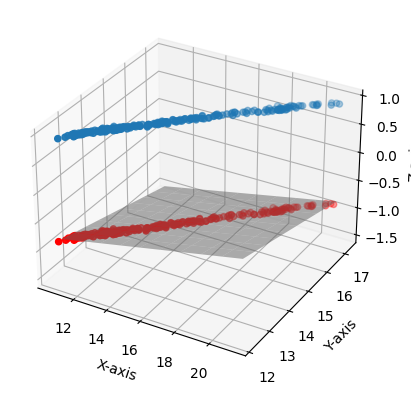

In [ ]:
# Plot the 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(numpy_array[:, 0], numpy_array[:, 1], numpy_array[:, 2], label='Original Points')

# Plot the plane spanned by u1 and u2
point_on_plane = np.zeros(3)  # You can choose any point on the plane
normal_vector = np.cross(u1, u2)
xx, yy = np.meshgrid(np.linspace(numpy_array[:, 0].min(), numpy_array[:, 0].max(), 10),
                     np.linspace(numpy_array[:, 1].min(), numpy_array[:, 1].max(), 10))
zz = (-normal_vector[0] * (xx - point_on_plane[0]) - normal_vector[1] * (yy - point_on_plane[1])) / normal_vector[2]
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray', label='Plane spanned by u1 and u2')

# Plot the projected points onto the plane
ax.scatter(combined_projections[:, 0], combined_projections[:, 1], combined_projections[:, 2], color='red', label='Projected Points')

# Set labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')


# Show the plot
plt.show()

In [ ]:
# Assuming you have a 3D dataset numpy_array and the basis vectors u1 and u2
# numpy_array = ...
# u1, u2 = ...

# Project all 3D points onto u1 and u2 using the provided code
dot_products_u1 = np.dot(numpy_array[:, :3], u1)
dot_products_u2 = np.dot(numpy_array[:, :3], u2)

# Create the new 2-dimensional coordinates [X]U
new_coordinates_U = np.column_stack((dot_products_u1, dot_products_u2))

# Display the new coordinates
print("New 2-dimensional Coordinates [X]U:")
print(new_coordinates_U)


New 2-dimensional Coordinates [X]U:
[[  7.14738346 -19.99199207]
 [  7.05521321 -19.53492906]
 [  6.8559967  -18.80050153]
 [  6.90331934 -18.32843199]
 [  6.92328641 -20.85670479]
 [  6.92955496 -18.93159999]
 [  7.05973536 -19.32882014]
 [  6.93962269 -18.64020207]
 [  7.15449383 -21.49574043]
 [  7.03943536 -21.23663147]
 [  7.15662013 -19.99606774]
 [  7.02777539 -18.59161132]
 [  6.95651848 -18.4066981 ]
 [  7.0387726  -18.32255434]
 [  7.04608327 -18.28195033]
 [  6.90750235 -19.15189808]
 [  6.74012934 -18.42056558]
 [  6.88757285 -20.34795114]
 [  6.79757844 -19.22381351]
 [  7.02455298 -17.15484959]
 [  7.19527774 -18.80815764]
 [  7.08694015 -18.70542823]
 [  6.94749287 -20.58259681]
 [  6.97571958 -16.43180829]
 [  7.17669311 -19.73109174]
 [  7.05940106 -20.97165899]
 [  7.07589772 -17.50625144]
 [  7.1085991  -17.213872  ]
 [  7.01323449 -18.6728167 ]
 [  7.13796273 -18.00490529]
 [  7.0733551  -17.65855621]
 [  7.14477389 -20.24278112]
 [  7.23334153 -18.748313  ]
 [  7.0